<a href="https://colab.research.google.com/github/debg48/Wine_Quality/blob/main/redwinequality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Course Project - Zero to GBMs



In [2]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('redwinequality')
jovian.set_colab_id('1jDL6287-XYvIetoorZvjldf8qsoSRXi7')

In [3]:
!pip install jovian --upgrade --quiet

In [4]:
import jovian

In [5]:
# Execute this to save new versions of the notebook
jovian.commit(project="redwinequality")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/debg48/redwinequality


'https://jovian.ai/debg48/redwinequality'

## Downloading the Dataset

In [6]:
!pip install opendatasets --upgrade --quiet

In [7]:
dataset_url = 'https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009'

In [8]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: debg48
Your Kaggle Key: ··········


100%|██████████| 25.6k/25.6k [00:00<00:00, 14.3MB/s]

In [9]:
data_dir = './red-wine-quality-cortez-et-al-2009'

In [10]:
import os
os.listdir(data_dir)

['winequality-red.csv']

## Data Preparation and Cleaning

In [11]:
import numpy as np
import pandas as pd

In [12]:
wine_df = pd.read_csv(data_dir + '/winequality-red.csv')

In [13]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [14]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [15]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


We will cross check if there are NAN or Null values in the dataframe

In [16]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [17]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/debg48/redwinequality


'https://jovian.ai/debg48/redwinequality'

We will check the unique values in each column

In [18]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [19]:
for column in wine_df.columns:
  print(column + ' : ')
  print(np.unique(wine_df[column]))
  print('\n')

fixed acidity : 
[ 4.6  4.7  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9  6.
  6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3  7.4
  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8
  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9 10.  10.1 10.2
 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1 11.2 11.3 11.4 11.5 11.6
 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5 12.6 12.7 12.8 12.9 13.
 13.2 13.3 13.4 13.5 13.7 13.8 14.  14.3 15.  15.5 15.6 15.9]


volatile acidity : 
[0.12  0.16  0.18  0.19  0.2   0.21  0.22  0.23  0.24  0.25  0.26  0.27
 0.28  0.29  0.295 0.3   0.305 0.31  0.315 0.32  0.33  0.34  0.35  0.36
 0.365 0.37  0.38  0.39  0.395 0.4   0.41  0.415 0.42  0.43  0.44  0.45
 0.46  0.47  0.475 0.48  0.49  0.5   0.51  0.52  0.53  0.54  0.545 0.55
 0.56  0.565 0.57  0.575 0.58  0.585 0.59  0.595 0.6   0.605 0.61  0.615
 0.62  0.625 0.63  0.635 0.64  0.645 0.65  0.655 0.66  0.665 0.67  0.675
 0.68  0.685 0.69  0.695 0.7   0.705 0.71

In [20]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/debg48/redwinequality


'https://jovian.ai/debg48/redwinequality'

## Exploratory Analysis and Visualization

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

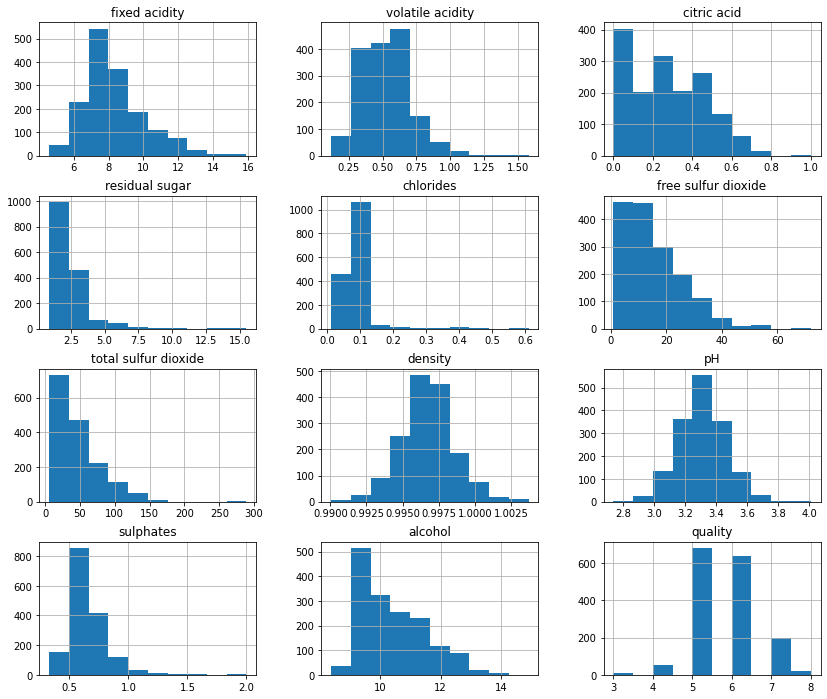

In [22]:
wine_df.hist(figsize = (14,12))
plt.show()

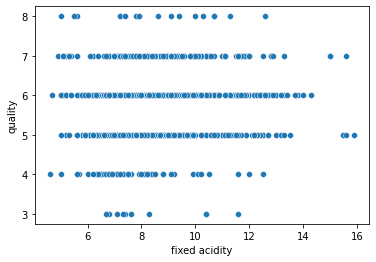

In [23]:
sns.scatterplot(x=wine_df['fixed acidity'], y=wine_df['quality']);

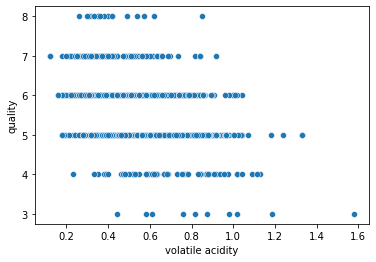

In [24]:
sns.scatterplot(x=wine_df['volatile acidity'], y=wine_df['quality']);

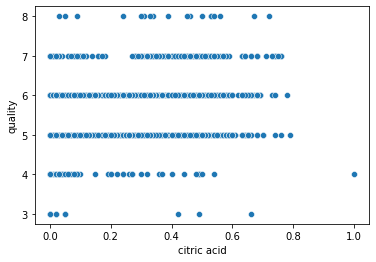

In [25]:
sns.scatterplot(x=wine_df['citric acid'], y=wine_df['quality']);

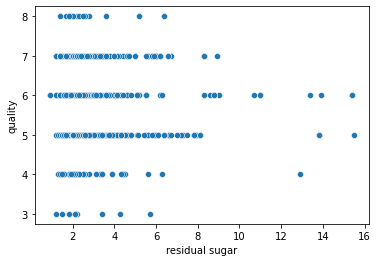

In [26]:
sns.scatterplot(x=wine_df['residual sugar'], y=wine_df['quality']);

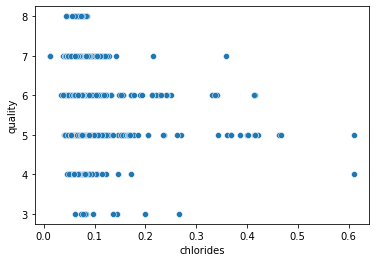

In [27]:
sns.scatterplot(x=wine_df['chlorides'], y=wine_df['quality']);

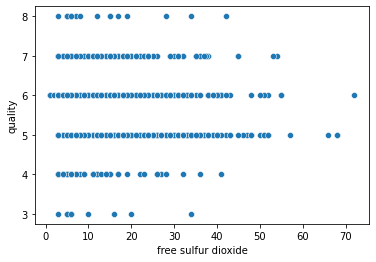

In [28]:
sns.scatterplot(x=wine_df['free sulfur dioxide'], y=wine_df['quality']);

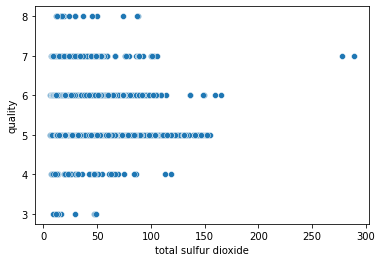

In [29]:
sns.scatterplot(x=wine_df['total sulfur dioxide'], y=wine_df['quality']);

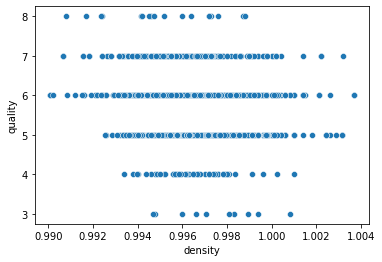

In [30]:
sns.scatterplot(x=wine_df['density'], y=wine_df['quality']);

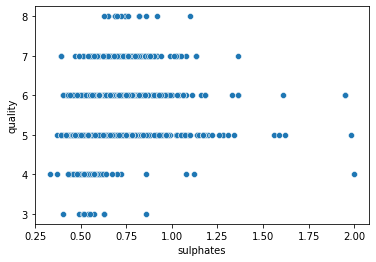

In [31]:
sns.scatterplot(x=wine_df['sulphates'], y=wine_df['quality']);

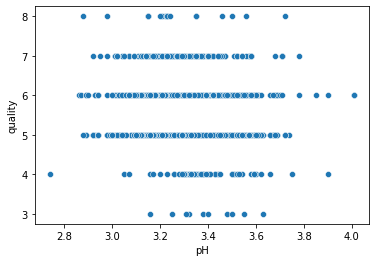

In [32]:
sns.scatterplot(x=wine_df['pH'], y=wine_df['quality']);

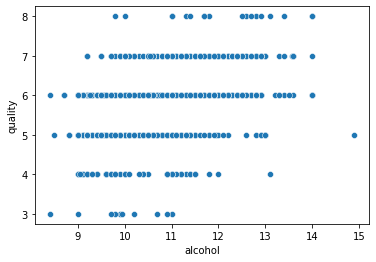

In [33]:
sns.scatterplot(x=wine_df['alcohol'], y=wine_df['quality']);

In [34]:
corr = wine_df.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [35]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/debg48/redwinequality


'https://jovian.ai/debg48/redwinequality'

## Preparing Data for Training

Identifying input and target columns

In [36]:
input_cols, target_col = wine_df.columns[1:-1], wine_df.columns[-1]
inputs_df, targets = wine_df[input_cols].copy(), wine_df[target_col].copy()

In [37]:
input_cols

Index(['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')

In [38]:
target_col

'quality'

Identifying numeric and categorical columns

In [39]:
numeric_cols = wine_df[input_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols = wine_df[input_cols].select_dtypes(include='object').columns.tolist()

In [40]:
numeric_cols

['volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [41]:
categorical_cols

[]

As we observe there is no categorical column

Impute and scale numeric columns

In [42]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

imputer = SimpleImputer().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = imputer.transform(inputs_df[numeric_cols])
scaler = MinMaxScaler().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

In [43]:
inputs_df[numeric_cols]

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
...,...,...,...,...,...,...,...,...,...,...
1594,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077
1595,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769
1596,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000
1597,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923


In [44]:
from sklearn.model_selection import train_test_split

train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs_df[numeric_cols], targets, test_size=0.25, random_state=42)

In [45]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/debg48/redwinequality


'https://jovian.ai/debg48/redwinequality'

## Training Model

#### Helper Function for calculating RMSE

In [46]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

### Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lin_model = LinearRegression()

In [49]:
lin_model.fit(train_inputs, train_targets)

LinearRegression()

In [50]:
lin_train_preds = lin_model.predict(train_inputs)

In [51]:
lin_train_preds

array([5.22270231, 5.04581653, 5.86380895, ..., 4.96627839, 6.64175917,
       6.77987478])

In [52]:
lin_train_rmse=rmse(train_targets,lin_train_preds)

In [53]:
lin_val_preds = lin_model.predict(val_inputs)

In [54]:
lin_val_rmse = rmse(val_targets,lin_val_preds)

In [55]:
print('Train RMSE: {}, Validation RMSE: {}'.format(lin_train_rmse, lin_val_rmse))

Train RMSE: 0.6539205241786353, Validation RMSE: 0.6235253218434822


### Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
log_model = LogisticRegression(solver='liblinear')

In [58]:
log_model.fit(train_inputs, train_targets)

LogisticRegression(solver='liblinear')

In [59]:
log_train_preds = log_model.predict(train_inputs)

In [60]:
log_train_rmse=rmse(train_targets,log_train_preds)

In [61]:
log_val_preds = log_model.predict(val_inputs)

In [62]:
log_val_rmse = rmse(val_targets,log_val_preds)

In [63]:
print('Train RMSE: {}, Validation RMSE: {}'.format(log_train_rmse, log_val_rmse))

Train RMSE: 0.7436133408346186, Validation RMSE: 0.733143914930759


### Decision Tree

In [64]:
from sklearn.tree import DecisionTreeRegressor

In [65]:
tree = DecisionTreeRegressor(random_state=42)

In [66]:
tree.fit(train_inputs,train_targets)

DecisionTreeRegressor(random_state=42)

In [67]:
tree_train_preds = tree.predict(train_inputs)

In [68]:
tree_train_rmse = rmse(train_targets,tree_train_preds)

In [69]:
tree_val_preds = tree.predict(val_inputs)

In [70]:
tree_val_rmse = rmse(val_targets,tree_val_preds)

In [71]:
print('Train RMSE: {}, Validation RMSE: {}'.format(tree_train_rmse, tree_val_rmse))

Train RMSE: 0.0, Validation RMSE: 0.8246211251235321


### Random Forest

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
rf = RandomForestRegressor(n_jobs=-1,random_state=42)

In [74]:
rf.fit(train_inputs,train_targets)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [75]:
rf_train_preds = rf.predict(train_inputs)

In [77]:
rf_train_rmse = rmse(train_targets,rf_train_preds)

In [78]:
rf_val_preds = rf.predict(val_inputs)

In [79]:
rf_val_rmse = rmse(val_targets,rf_val_preds)

In [80]:
print('Train RMSE: {}, Validation RMSE: {}'.format(rf_train_rmse, rf_val_rmse))

Train RMSE: 0.22528528850699817, Validation RMSE: 0.5581601472695806


#### Hyperparameter Tuning

We create ahelper function to test ,plot and tune Hyperparameters

In [81]:
def test_params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_rmse = rmse(model.predict(train_inputs), train_targets)
    val_rmse = rmse(model.predict(val_inputs), val_targets)
    return train_rmse, val_rmse

In [154]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

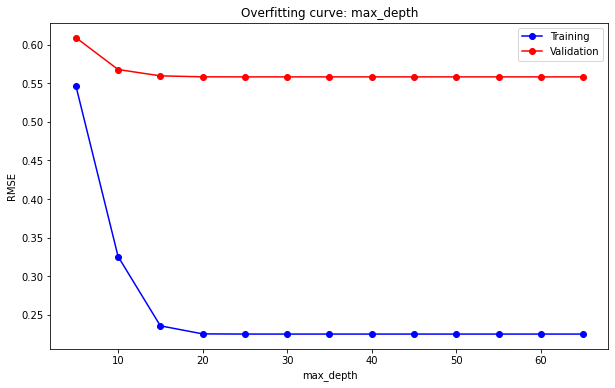

In [84]:
test_param_and_plot('max_depth', [5, 10, 15, 20, 25, 30, 35,40,45,50,55,60,65]) #30

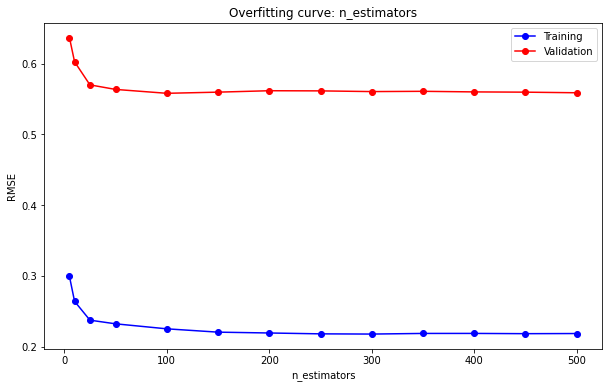

In [91]:
test_param_and_plot('n_estimators', [ 5,10,25,50,100,150,200,250,300,350,400,450,500]) #300

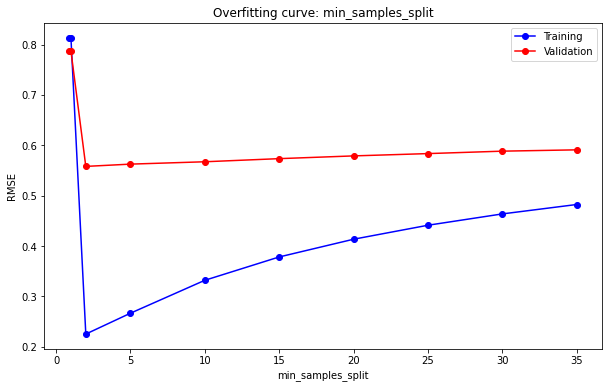

In [106]:
test_param_and_plot('min_samples_split', [0.9,1.0,2, 5, 10, 15, 20, 25,30, 35]) #1.0

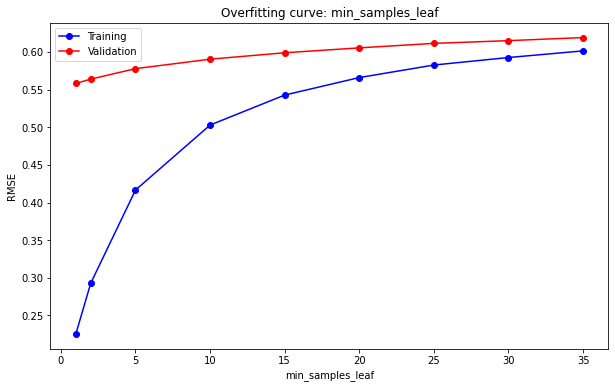

In [102]:
test_param_and_plot('min_samples_leaf', [1,2,5, 10, 15, 20, 25, 30, 35]) #1

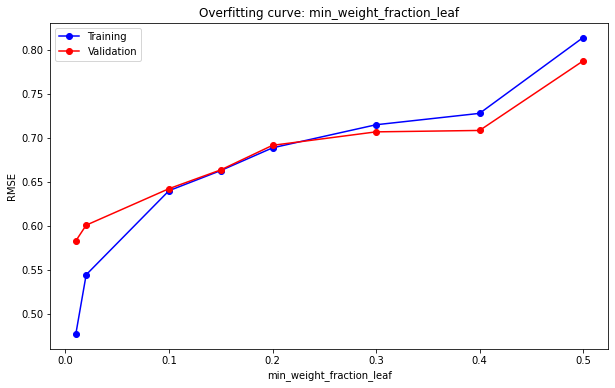

In [101]:
test_param_and_plot('min_weight_fraction_leaf', [0.01,0.02, 0.1, 0.15,0.2, 0.3, 0.4, 0.5]) #0.01

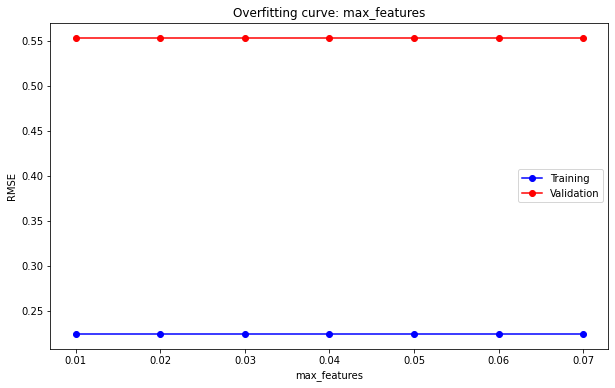

In [116]:
test_param_and_plot('max_features', [0.01,0.02,0.03,0.04,0.05,0.06,0.07]) #hardly any change

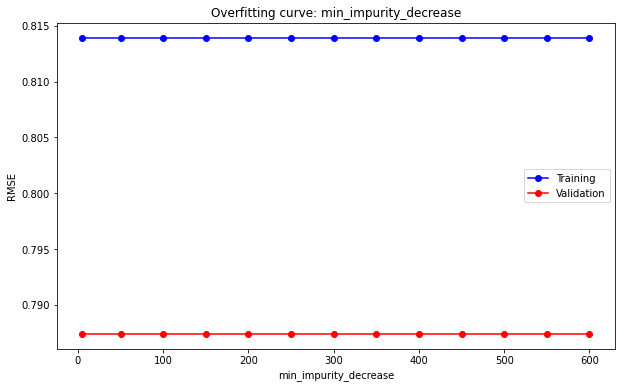

In [115]:
test_param_and_plot('min_impurity_decrease', [5, 50,100,150,200,250,300,350,400,450,500,550,600]) #hardly any change

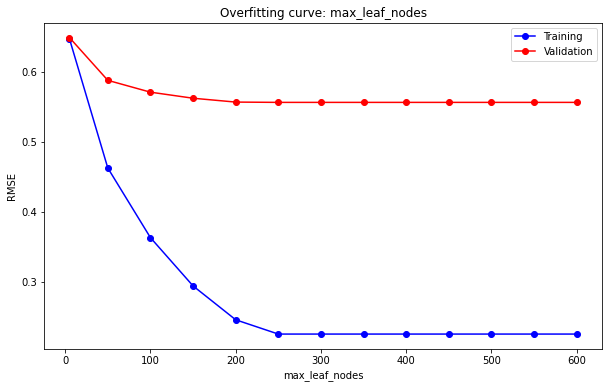

In [117]:
test_param_and_plot('max_leaf_nodes', [5, 50,100,150,200,250,300,350,400,450,500,550,600]) #450

In [140]:
rf2 = RandomForestRegressor(n_jobs=-1,
                               random_state=42, 
                               n_estimators=300,
                               max_depth=30,
                               min_samples_split=1.0,
                               min_samples_leaf=1,
                               max_leaf_nodes=450)

In [141]:
rf2.fit(train_inputs,train_targets)

RandomForestRegressor(max_depth=30, max_leaf_nodes=450, min_samples_split=1.0,
                      n_estimators=300, n_jobs=-1, random_state=42)

In [142]:
rf2_train_preds = rf2.predict(train_inputs)

In [143]:
rf2_train_rmse = rmse(train_targets,rf2_train_preds)

In [144]:
rf2_val_preds = rf2.predict(val_inputs)

In [145]:
rf2_val_rmse = rmse(val_targets,rf2_val_preds)

In [146]:
print('Train RMSE: {}, Validation RMSE: {}'.format(rf2_train_rmse, rf2_val_rmse))

Train RMSE: 0.8139507604996443, Validation RMSE: 0.7873703987446767


### Gradient Boosting

In [125]:
from xgboost import XGBRegressor

In [147]:
xgb = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [173]:
%%time
xgb.fit(train_inputs, train_targets)

[04:46:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 50.9 ms, sys: 3 ms, total: 53.9 ms
Wall time: 34 ms


XGBRegressor(max_depth=4, n_estimators=20, n_jobs=-1, random_state=42)

In [149]:
xgb_train_preds = xgb.predict(train_inputs)

In [150]:
xgb_train_rmse = rmse(train_targets,xgb_train_preds)

In [151]:
xgb_val_preds = xgb.predict(val_inputs)

In [152]:
xgb_val_rmse = rmse(val_targets,xgb_val_preds)

In [153]:
print('Train RMSE: {}, Validation RMSE: {}'.format(xgb_train_rmse, xgb_val_rmse))

Train RMSE: 0.8476554947158733, Validation RMSE: 0.896575107174437


#### Hyperparameter Tuning

In [170]:
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(train_inputs , train_targets);
    train_rmse = rmse(model.predict(train_inputs), train_targets)
    val_rmse = rmse(model.predict(val_inputs), val_targets)
    return train_rmse ,val_rmse

In [171]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

[04:51:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:51:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:51:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:51:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:51:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:51:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:52:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

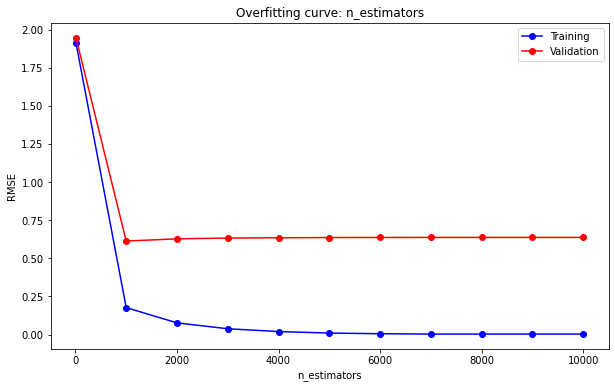

In [180]:
test_param_and_plot('n_estimators', [10,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]) #7000

[04:53:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:53:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:53:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:53:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:53:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:53:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:53:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:53:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

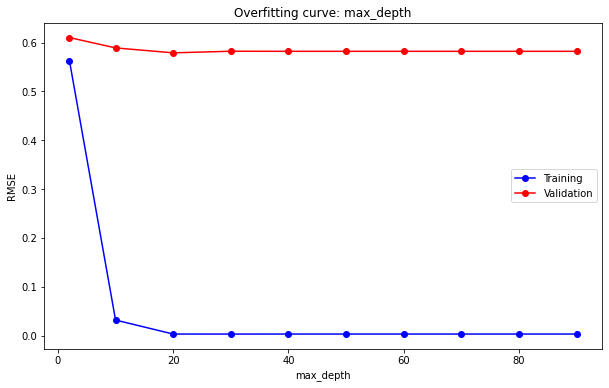

In [182]:
test_param_and_plot('max_depth', [2,10,20,30,40,50,60,70,80,90]) #60

[04:54:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:54:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

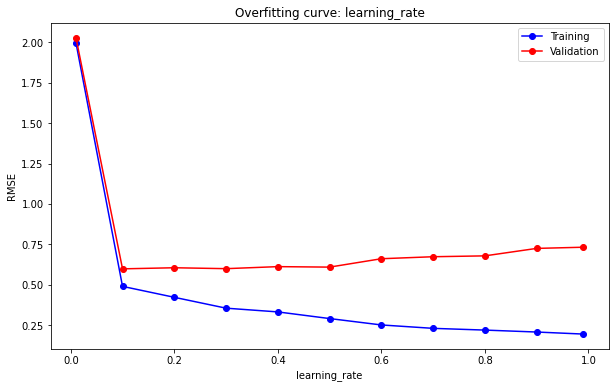

In [184]:
test_param_and_plot('learning_rate', [0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]) #0.4

In [186]:
test_rmse , val_rmse = test_params(booster='gblinear')

[04:56:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [187]:
test_rmse

0.8046586930238158

In [188]:
val_rmse

0.7787748459925713

In [189]:
xgb2 = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=7000, 
                     learning_rate=0.4, max_depth=60, 
                     booster='gblinear')

In [191]:
%%time
xgb2.fit(train_inputs, train_targets)

[04:59:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 7.14 s, sys: 42.8 ms, total: 7.19 s
Wall time: 6.38 s


XGBRegressor(booster='gblinear', learning_rate=0.4, max_depth=60,
             n_estimators=7000, n_jobs=-1, random_state=42)

In [192]:
xgb2_train_preds = xgb2.predict(train_inputs)

In [193]:
xgb2_train_rmse = rmse(train_targets,xgb2_train_preds)

In [194]:
xgb2_val_preds = xgb2.predict(val_inputs)

In [195]:
xgb2_val_rmse = rmse(val_targets,xgb2_val_preds)

In [196]:
print('Train RMSE: {}, Validation RMSE: {}'.format(xgb2_train_rmse, xgb2_val_rmse))

Train RMSE: 0.8045984636007066, Validation RMSE: 0.7777864795551724


## Training the Final Model

As the RMSE of the first Random Forest was least

In [197]:
from sklearn.ensemble import RandomForestRegressor

In [198]:
model = RandomForestRegressor(n_jobs=-1,random_state=42)